Notes: Data from only the last three years is saved by Facebook.

# Make list of websites

In [2]:
import pandas as pd

#name_of_file = '/content/drive/MyDrive/your_off-facebook_activity.json' # Liam's older data
#name_of_file = '/content/drive/MyDrive/your_activity_off_meta_technologies.json' # Liam's newer data
name_of_file = "E:\\Code\\Git Projects\\FileTransfer\\OLD JSON\\apps_and_websites_off_of_facebook\\your_off-facebook_activity.json" # Carter's data
data = pd.read_json(name_of_file, orient='records')

websites = data['off_facebook_activity_v2']
websites.index = list(range(len(websites)))

In [3]:
print(websites.to_string())

0      {'name': 'TikTok', 'events': [{'id': 597615686...
1      {'name': 'PokÃ©mon GO', 'events': [{'id': 1216...
2      {'name': 'IMLeagues', 'events': [{'id': 193639...
3      {'name': 'Peacock TV', 'events': [{'id': 55300...
4      {'name': 'Discord: Talk, Chat & Hang Out', 'ev...
5      {'name': 'Spotify: Music and Podcasts', 'event...
6      {'name': 'Brain Blow: Genius IQ Test', 'events...
7      {'name': 'LinkedIn: Jobs & Business News', 'ev...
8      {'name': 'Fruit Merge: Watermelon Puzzle', 'ev...
9      {'name': 'Magic: The Gathering Arena', 'events...
10     {'name': 'Twitch: Live Game Streaming', 'event...
11     {'name': 'Amazon', 'events': [{'id': 558293300...
12     {'name': 'CSC GO Laundry', 'events': [{'id': 3...
13     {'name': 'etsy.com', 'events': [{'id': 1146234...
14     {'name': 'hulu.com', 'events': [{'id': 9314856...
15     {'name': 'calendly.com', 'events': [{'id': 475...
16     {'name': 'speechify.com', 'events': [{'id': 33...
17     {'name': 'Venmo', 'event

In [4]:
for w in range(len(websites)):
  for x in range(w + 1, len(websites)):
    if(x >= len(websites)):
      break
    if websites[w]['name'] == websites[x]['name']:
      websites[w]['events'].extend(websites.pop(x)['events'])
      websites.index = list(range(len(websites)))
      x -= 1
      continue

In [5]:
# Aggregate multiple websites with the exact same name

site_names = []
for w in websites:
  site_names.append(w['name'])

num_of_entries_per_website = []

for site in websites:
  num_of_entries_per_website.append(len(site['events']))

In [6]:
def insertionSort(arr1, arr2):
    n = len(arr1)

    if n <= 1:
        return

    for i in range(1, n):
        key = arr1[i]
        key2 = arr2[i]
        j = i-1
        while j >= 0 and key > arr1[j]:
            arr1[j+1] = arr1[j]
            arr2[j+1] = arr2[j]
            j -= 1
        arr1[j+1] = key
        arr2[j+1] = key2

In [7]:
insertionSort(num_of_entries_per_website, site_names)

website_names = []

for i in range (len(site_names)):
  input_string = site_names[i]
  decoded_string = input_string.encode('latin-1').decode('utf-8')

  website_names.append(((decoded_string), num_of_entries_per_website[i]))

In [8]:
# List of websites sorted by most visited, with name of website & number of visits
website_names

[('TikTok', 3211),
 ('Peacock TV', 465),
 ('Discord - Chat, Talk & Hangout', 365),
 ('Discord: Talk, Chat & Hang Out', 210),
 ('Spotify: Music and Podcasts', 162),
 ('Tinder - Dating & Make Friends', 146),
 ('Legend of Slime: Idle RPG', 130),
 ('Reddit', 129),
 ('IMLeagues', 123),
 ('Star Wars™: Galaxy of Heroes', 115),
 ('Pokémon GO', 113),
 ('GroupMe', 113),
 ('Twitter', 104),
 ('Cat Snack Bar : Cat Food Games', 63),
 ('Spotify: Music, Podcasts, Lit', 58),
 ('Rent Please!-Landlord Sim', 47),
 ('Cat Snack Bar', 42),
 ('Cat Snack Bar : offline games', 41),
 ('Cat Snack Bar :idle restaurant', 39),
 ('inkedgaming.com', 37),
 ('hulu.com', 31),
 ('Twitch: Live Game Streaming', 30),
 ('Discord - Talk, Chat & Hangout with Friends', 30),
 ('Clash of Clans', 25),
 ('Discord - Voice & Video Chat', 25),
 ('imleagues.com', 22),
 ('Cats & Soup - Cute idle Game', 21),
 ('Life360: Live Location Sharing', 18),
 ('Venmo', 14),
 ('Tap to Build', 13),
 ('LinkedIn: Jobs & Business News', 11),
 ('Life360:

#Graphs & Activity Analysis

###Most Visited Sites Graphs

C:\Users\cshac\AppData\Local\Temp\ipykernel_7908\1485149458.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')


[Text(0.5, 1.0, 'Top 5 Most Visited Sites')]

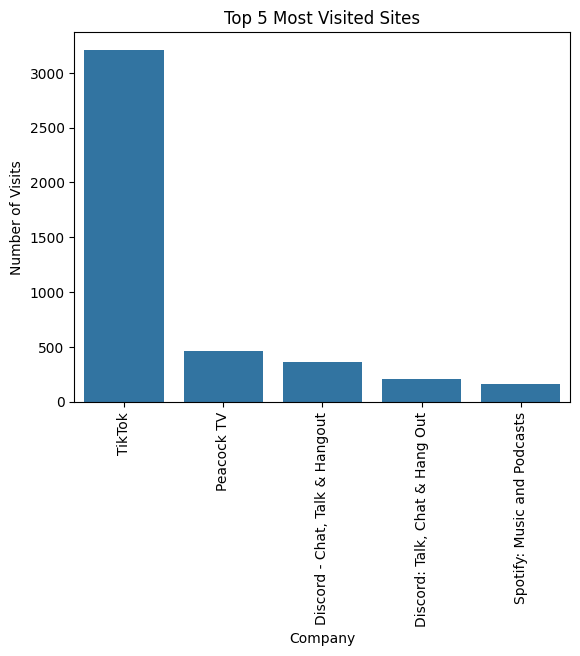

In [61]:
import seaborn as sns

# To get top n
n = 5
d = {'Company':[], 'Number of Visits':[]}

for w in website_names[0:n]:
  d['Company'].append(w[0])
  d['Number of Visits'].append(w[1])

df = pd.DataFrame(data = d)

ax = sns.barplot(x='Company', y='Number of Visits', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
ax.set(title='Top 5 Most Visited Sites')

In [10]:
# FAKE
'''
d = {'Company':[], 'Number of Visits':[]};

d['Company'].append('Google')
d['Number of Visits'].append(100)

d['Company'].append('YouTube')
d['Number of Visits'].append(80)

d['Company'].append('Amazon')
d['Number of Visits'].append(70)

d['Company'].append('Facebook')
d['Number of Visits'].append(50)

d['Company'].append('Wikipedia')
d['Number of Visits'].append(40)

df = pd.DataFrame(data = d)

ax = sns.barplot(x='Company', y='Number of Visits', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
ax.set(title='Top 5 Most Visited Sites')
'''

"\nd = {'Company':[], 'Number of Visits':[]};\n\nd['Company'].append('Google')\nd['Number of Visits'].append(100)\n\nd['Company'].append('YouTube')\nd['Number of Visits'].append(80)\n\nd['Company'].append('Amazon')\nd['Number of Visits'].append(70)\n\nd['Company'].append('Facebook')\nd['Number of Visits'].append(50)\n\nd['Company'].append('Wikipedia')\nd['Number of Visits'].append(40)\n\ndf = pd.DataFrame(data = d)\n\nax = sns.barplot(x='Company', y='Number of Visits', data=df)\nax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')\nax.set(title='Top 5 Most Visited Sites')\n"

C:\Users\cshac\AppData\Local\Temp\ipykernel_7908\1047130525.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')


[Text(0.5, 1.0, 'Sites with more than 50 views')]

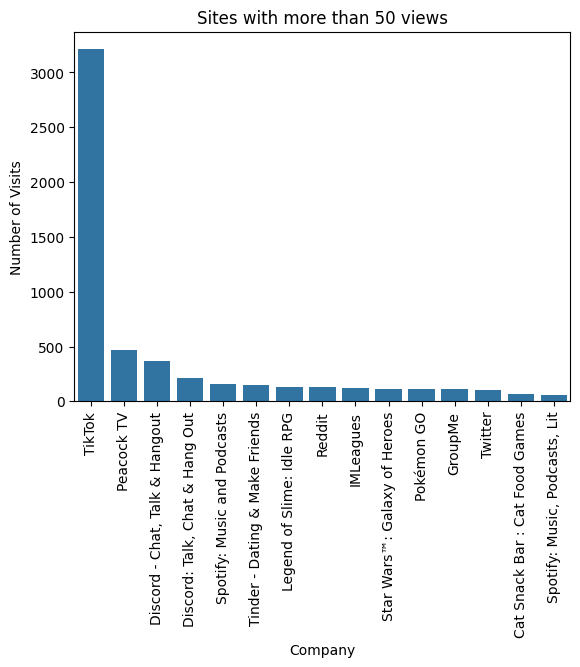

In [63]:
d = {'Company':[], 'Number of Visits':[]}

for w in website_names:
  if(w[1] >= 50):
    d['Company'].append(w[0])
    d['Number of Visits'].append(w[1])

df = pd.DataFrame(data = d)

ax = sns.barplot(x='Company', y='Number of Visits', data=df, errorbar=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
ax.set(title='Sites with more than 50 views')

###Get Timezones over time

In [12]:

!pip install fastapi
!pip install python-multipart
!pip install uvicorn
!pip install kaleido
!pip install maxminddb

import json
from datetime import timedelta, datetime
import maxminddb


In [13]:
#please update this to fit your path

file = "E:\\Code\\Git Projects\\FileTransfer\\OLD JSON\\security_and_login_information\\account_activity.json"

def get_ips(filename):
    try:
        with open(filename, 'r') as file:
            json_content = json.load(file)
        return json_content
    except FileNotFoundError:
        print(f"File '{filename}' not found.")
        return None

ips = get_ips(file)

information = ips.popitem()[1]
df = pd.DataFrame(information)

def convert_to_gps(ip_address):
     with maxminddb.open_database("E:\\Code\\Git Projects\\selfscape_insight\\selfscape_insight\\features\\GeoLite2-City.mmdb") as reader:
        response = reader.get(ip_address)

     return response
  #################

  #################
'''
def density_report(time1, time2):
    t1_convert_time = datetime.utcfromtimestamp(time1)
    t2_convert_time = datetime.utcfromtimestamp(time2)

    spent = t2_convert_time - t1_convert_time
    days = spent.days

    days = days*-1

    if((spent.seconds//3600) > 20):
        days += 1

    if((days/365) > 1):
        return 1;
    else:
        return (days/365)
'''

mydict = []

start = 0
end = 0
df_len = len(df)

for index in range(df_len - 1):
    if df['city'][index] == df['city'][index + 1]:
        end = index + 1
    else:
        location = convert_to_gps(df['ip_address'][index])
        temp_dict = {
            'Start_Time': df['timestamp'][start],
            'End_Time': df['timestamp'][end],
            'City': df['city'][start],
            'State': df['region'][start],
            'latitude': location['location']['latitude'],
            'longitude': location['location']['longitude'],
            #'days spent/365 days(one year)': density_report(df['timestamp'][start], df['timestamp'][end])
        }
        mydict.append(temp_dict)
        start = end + 1  # Adjusted indexing
        end = end + 1

# Process the last group
location = convert_to_gps(df['ip_address'][df_len - 1])
temp_dict = {
    'Start_Time': df['timestamp'][start],
    'End_Time': df['timestamp'][df_len - 1],
    'City': df['city'][start],
    'State': df['region'][start],
    'latitude': location['location']['latitude'],
    'longitude': location['location']['longitude'],
    #'days spent/365 days(one year)': density_report(df['timestamp'][start], df['timestamp'][df_len - 1])
}
mydict.append(temp_dict)

finalDF = pd.DataFrame(mydict)
finalDF = finalDF[::-1]
finalDF


,Start_Time,End_Time,City,State,latitude,longitude
84,1465946453,1465946453,Lacey,Washington,47.0213,-122.7774
83,1469381012,1469142966,Seattle,Washington,37.7510,-97.8220
82,1472008351,1472008351,Portland,Oregon,45.5288,-122.6821
81,1477023249,1473816231,Spokane,Washington,47.6987,-117.4397
80,1492225622,1492225622,Rochester,Washington,47.0213,-122.7774
...,...,...,...,...,...,...
4,1700910658,1700910658,Tumwater,Washington,47.0111,-122.8750
3,1700975821,1700975821,Coupeville,Washington,47.6109,-122.3303
2,1701183492,1701001125,Bellingham,Washington,48.7494,-122.4896
1,1701235768,1701235768,Seattle,Washington,47.6109,-122.3303


In [14]:
# Liam's code
# Adds new column to finalDF: timezone_offset

#finalDF = pd.read_csv('/content/timezone_offset.csv')

timezone_offset = [0] * len(finalDF)
timezone_areas = [-180, -165, -150, -135, -120, -105, -90, -75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180]
for i in range(len(finalDF['longitude'])):
  longitude = finalDF['longitude'][i]
  for j in range(len(timezone_areas)):
    if longitude < timezone_areas[j]:
      timezone_offset[i] = j - 12
      break

finalDF['timezone_offset'] = timezone_offset[::-1]
finalDF.to_csv('timezone_offset.csv', index=False)
finalDF

,Start_Time,End_Time,City,State,latitude,longitude,timezone_offset
84,1465946453,1465946453,Lacey,Washington,47.0213,-122.7774,-8
83,1469381012,1469142966,Seattle,Washington,37.7510,-97.8220,-6
82,1472008351,1472008351,Portland,Oregon,45.5288,-122.6821,-8
81,1477023249,1473816231,Spokane,Washington,47.6987,-117.4397,-7
80,1492225622,1492225622,Rochester,Washington,47.0213,-122.7774,-8
...,...,...,...,...,...,...,...
4,1700910658,1700910658,Tumwater,Washington,47.0111,-122.8750,-8
3,1700975821,1700975821,Coupeville,Washington,47.6109,-122.3303,-8
2,1701183492,1701001125,Bellingham,Washington,48.7494,-122.4896,-8
1,1701235768,1701235768,Seattle,Washington,47.6109,-122.3303,-8


In [15]:
for site in websites:
  for event in site['events']:
    timestamp = event['timestamp']
    for i in range(len(finalDF)):
      endTime = finalDF['End_Time'][i]
      if (timestamp >= endTime):
        #break
        event['timestamp'] += finalDF['timezone_offset'][i]*3600

###Internet Activity over Time Graphs

C:\Users\cshac\AppData\Local\Temp\ipykernel_7908\1169664763.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')


[Text(0.5, 1.0, 'Internet Activity by Year')]

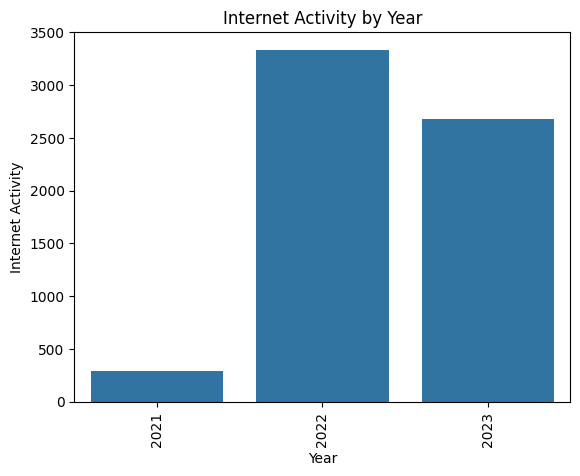

In [16]:
# Graphs of internet activity over time (year)

# Need two passes - one to find the highest year, and one for the rest

data = pd.DataFrame()

lowestYear = 10000
highestYear = 0
for site in websites:
  for event in site['events']:
    timestamp = event['timestamp']
    year = (int)(1970 + timestamp/60/60/24/365.25)
    if year < lowestYear:
      lowestYear = year
    elif year > highestYear:
      highestYear = year

numberOfYears = highestYear - lowestYear + 1

eventsByYear = [0] * (numberOfYears)

for site in websites:
  for event in site['events']:
    timestamp = event['timestamp']
    year = (int)(1970 + timestamp/60/60/24/365.25) # will be a valid year
    year -= lowestYear
    eventsByYear[year] += 1

data['Internet Activity'] = pd.DataFrame(eventsByYear)
data['Year'] = [x+lowestYear for x in range(len(eventsByYear))]

ax = sns.barplot(x='Year', y='Internet Activity', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
ax.set(title='Internet Activity by Year')

C:\Users\cshac\AppData\Local\Temp\ipykernel_7908\1611787217.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')


[Text(0.5, 1.0, 'Internet Activity by Month')]

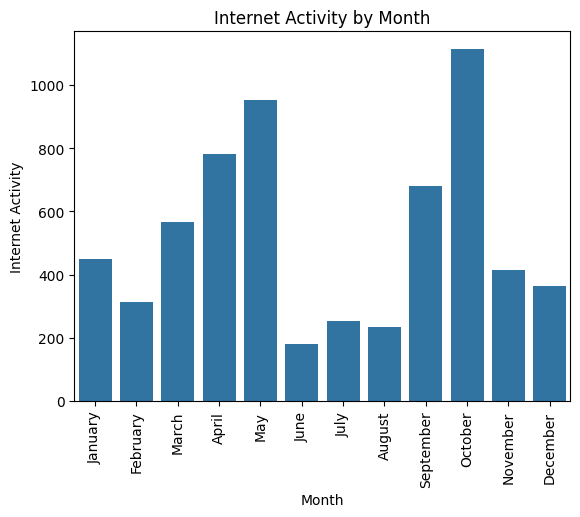

In [17]:
# Graphs of internet activity over time (month)

data = pd.DataFrame()

eventsByMonth = [0] * 12

for site in websites:
  for event in site['events']:
    timestamp = event['timestamp']
    year = (int)(1970 + timestamp/60/60/24/365.25)
    month = (int)((1970 + timestamp/60/60/24/365.25 - year)*12)
    eventsByMonth[month] += 1

data['Internet Activity'] = pd.DataFrame(eventsByMonth)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data['Month'] = months

ax = sns.barplot(x='Month', y='Internet Activity', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
ax.set(title='Internet Activity by Month')

C:\Users\cshac\AppData\Local\Temp\ipykernel_7908\2702150001.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')


[Text(0.5, 1.0, 'Internet Activity by Month')]

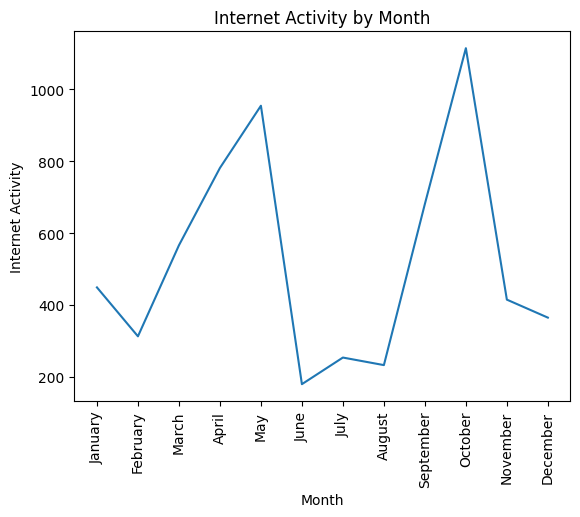

In [18]:
ax = sns.lineplot(x='Month', y='Internet Activity', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
ax.set(title='Internet Activity by Month')

C:\Users\cshac\AppData\Local\Temp\ipykernel_7908\2902758040.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')


[Text(0.5, 1.0, 'Internet Activity by Time of day')]

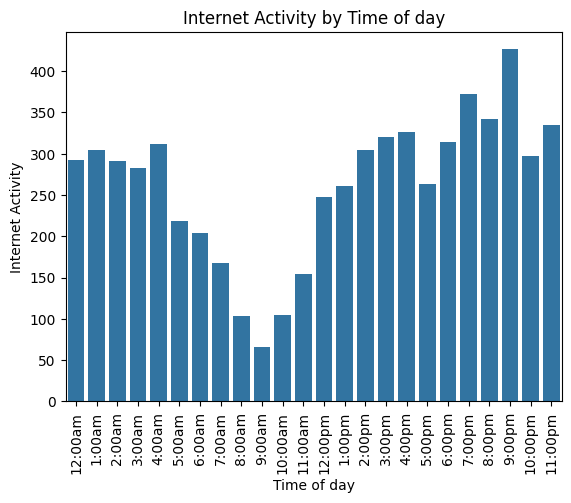

In [19]:
# Graphs of internet activity over time (time of day)

data = pd.DataFrame()

eventsByTimeOfDay = [0] * 24

for site in websites:
  for event in site['events']:
    timestamp = event['timestamp']
    day = (int)(1970 + timestamp/60/60/24)
    time_of_day = (int)((1970 + timestamp/60/60/24 - day)*24)
    eventsByTimeOfDay[time_of_day] += 1

data['Internet Activity'] = pd.DataFrame(eventsByTimeOfDay)
data['Time of day'] = ['12:00am', '1:00am', '2:00am', '3:00am', '4:00am','5:00am', '6:00am', '7:00am', '8:00am', '9:00am', '10:00am', '11:00am',
                       '12:00pm', '1:00pm', '2:00pm', '3:00pm', '4:00pm','5:00pm', '6:00pm', '7:00pm', '8:00pm', '9:00pm', '10:00pm', '11:00pm']

ax = sns.barplot(x='Time of day', y='Internet Activity', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
ax.set(title='Internet Activity by Time of day')

C:\Users\cshac\AppData\Local\Temp\ipykernel_7908\1066016938.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')


[Text(0.5, 1.0, 'Internet Activity by Time of day')]

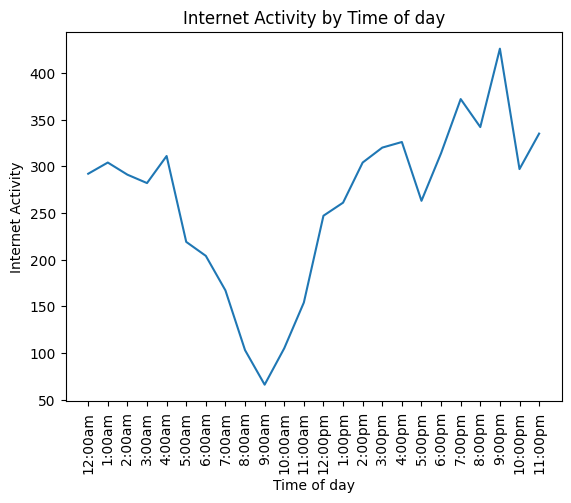

In [20]:
ax = sns.lineplot(x='Time of day', y='Internet Activity', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
ax.set(title='Internet Activity by Time of day')

[Text(0.5, 1.0, 'Internet Activity by Year and Month')]

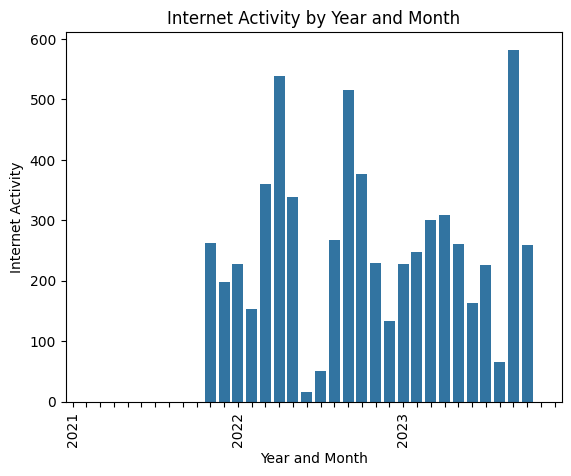

In [21]:
# Graphs of internet activity over time (month and year)

data = pd.DataFrame()

eventsByMonthAndYear = [0] * (len(eventsByYear) * 12)
earliestMonth = 13

for site in websites:
  for event in site['events']:
    timestamp = event['timestamp']
    month = (int)(timestamp/60/60/24/30.4167) # Number of months since Jan 1 1970
    month -= (lowestYear-1970)*12

    if month < earliestMonth:
      earliestMonth = month

    eventsByMonthAndYear[month-1] += 1

data['Internet Activity'] = pd.DataFrame(eventsByMonthAndYear)
data['Year and Month'] = [*range(0,len(eventsByMonthAndYear))]

labels = [''] * len(eventsByMonthAndYear)
year = lowestYear
for i in range(len(eventsByMonthAndYear)):
  if(i % 12 == 0):
    labels[i] = str(year)
    year += 1
  else:
    labels[i] = ''

ax = sns.barplot(x='Year and Month', y='Internet Activity', data=data)
ax.set_xticks(data['Year and Month'])
ax.set_xticklabels(labels, rotation=90, horizontalalignment='center')
ax.set(title='Internet Activity by Year and Month')

[Text(0.5, 1.0, 'Internet Activity by Year and Month')]

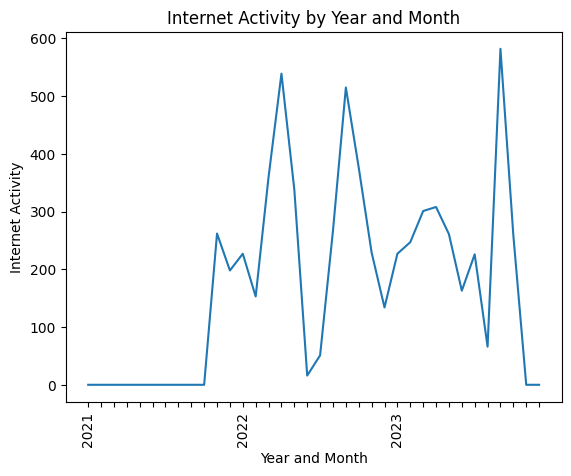

In [22]:
ax = sns.lineplot(x='Year and Month', y='Internet Activity', data=data)
ax.set_xticks(data['Year and Month'])
ax.set_xticklabels(labels, rotation=90, horizontalalignment='center')
ax.set(title='Internet Activity by Year and Month')

C:\Users\cshac\AppData\Local\Temp\ipykernel_7908\1506192358.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')


[Text(0.5, 1.0, 'Internet Activity by Day of the Week')]

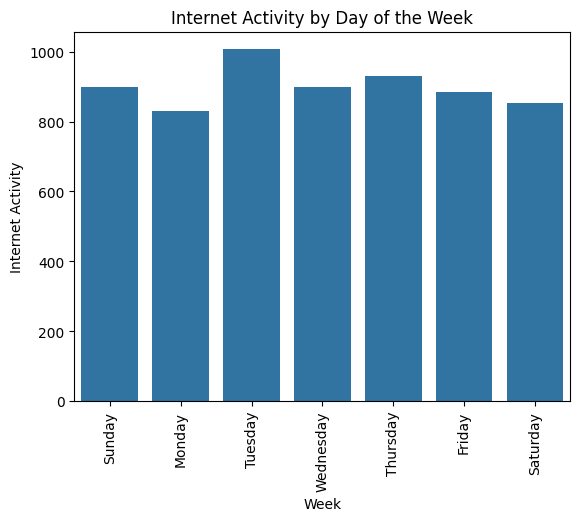

In [23]:
# Graphs of internet activity over time (week)

data = pd.DataFrame()

eventsByDayOfWeek = [0] * 7

for site in websites:
  for event in site['events']:
    timestamp = event['timestamp']
    day = (int)(1970 + timestamp/60/60/24)

    dayOfWeek = day % 7 + 4
    if dayOfWeek > 6:
      dayOfWeek -= 7
    eventsByDayOfWeek[dayOfWeek] += 1

data['Week'] = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
data['Internet Activity'] = pd.DataFrame(eventsByDayOfWeek)

ax = sns.barplot(x='Week', y='Internet Activity', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
ax.set(title='Internet Activity by Day of the Week')

C:\Users\cshac\AppData\Local\Temp\ipykernel_7908\3375847469.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')


[Text(0.5, 1.0, 'Internet Activity by Hour (Sunday)')]

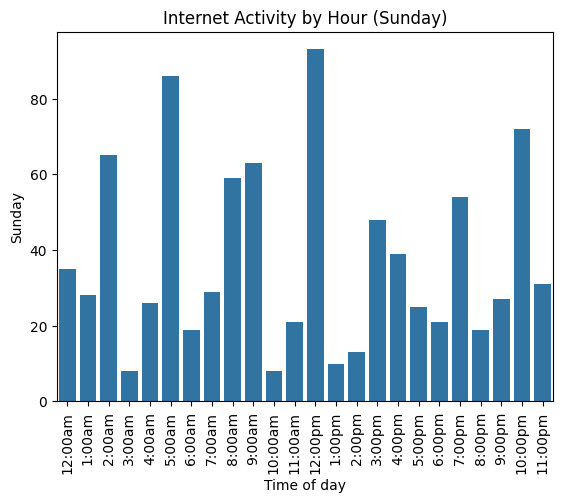

In [24]:
# Sunday - Jan 1 1970 was a Thursday
# NOT timezone adjusted

data = pd.DataFrame()

sunday = [0] * 24
monday = [0] * 24
tuesday = [0] * 24
wednesday = [0] * 24
thursday = [0] * 24
friday = [0] * 24
saturday = [0] * 24

for site in websites:
  for event in site['events']:
    timestamp = event['timestamp']
    day = (int)(1970 + timestamp/60/60/24)
    hour = (int)((1970 + timestamp/60/60/24) % 24)

    if day % 7 == 3:
      sunday[hour] += 1
    if day % 7 == 4:
      monday[hour] += 1
    if day % 7 == 5:
      tuesday[hour] += 1
    if day % 7 == 6:
      wednesday[hour] += 1
    if day % 7 == 0:
      thursday[hour] += 1
    if day % 7 == 1:
      friday[hour] += 1
    if day % 7 == 2:
      saturday[hour] += 1

data['Time of day'] = ['12:00am', '1:00am', '2:00am', '3:00am', '4:00am','5:00am', '6:00am', '7:00am', '8:00am', '9:00am', '10:00am', '11:00am',
                       '12:00pm', '1:00pm', '2:00pm', '3:00pm', '4:00pm','5:00pm', '6:00pm', '7:00pm', '8:00pm', '9:00pm', '10:00pm', '11:00pm']
data['Sunday'] = pd.DataFrame(sunday)
data['Monday'] = pd.DataFrame(monday)
data['Tuesday'] = pd.DataFrame(tuesday)
data['Wednesday'] = pd.DataFrame(wednesday)
data['Thursday'] = pd.DataFrame(thursday)
data['Friday'] = pd.DataFrame(friday)
data['Saturday'] = pd.DataFrame(saturday)

ax = sns.barplot(x='Time of day', y='Sunday', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
ax.set(title='Internet Activity by Hour (Sunday)')

C:\Users\cshac\AppData\Local\Temp\ipykernel_7908\160585017.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')


[Text(0.5, 1.0, 'Internet Activity by Hour (Sunday)')]

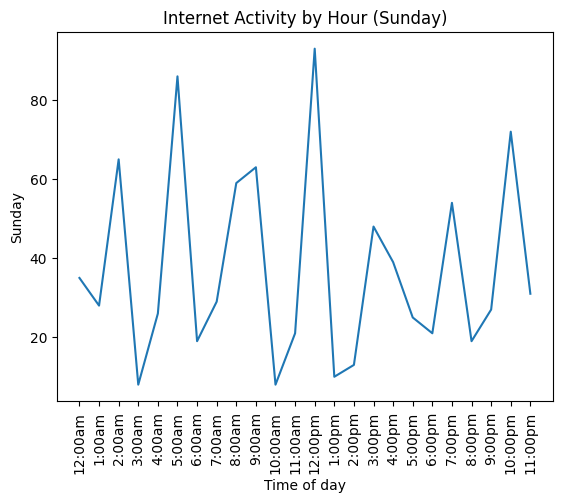

In [25]:
ax = sns.lineplot(x='Time of day', y='Sunday', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
ax.set(title='Internet Activity by Hour (Sunday)')

C:\Users\cshac\AppData\Local\Temp\ipykernel_7908\909565408.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')


[Text(0.5, 1.0, 'Internet Activity by Hour (Monday)')]

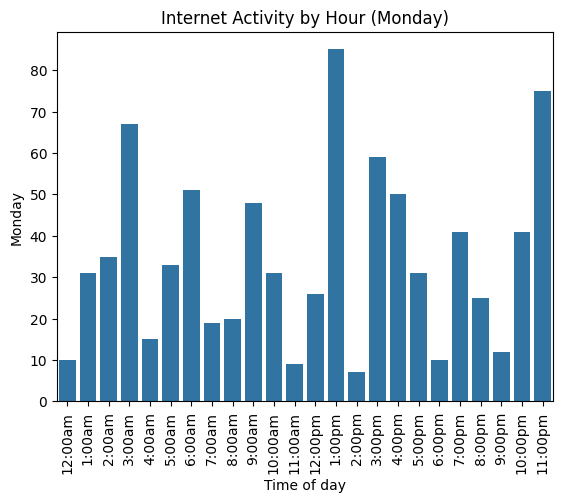

In [26]:
ax = sns.barplot(x='Time of day', y='Monday', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
ax.set(title='Internet Activity by Hour (Monday)')

C:\Users\cshac\AppData\Local\Temp\ipykernel_7908\2240302947.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')


[Text(0.5, 1.0, 'Internet Activity by Hour (Tuesday)')]

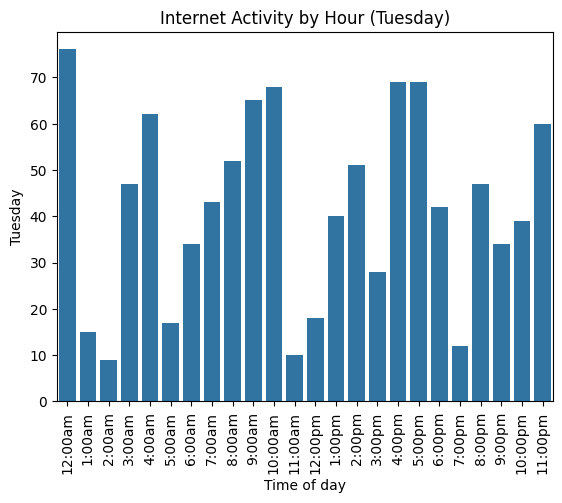

In [27]:
ax = sns.barplot(x='Time of day', y='Tuesday', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
ax.set(title='Internet Activity by Hour (Tuesday)')

C:\Users\cshac\AppData\Local\Temp\ipykernel_7908\3710722205.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')


[Text(0.5, 1.0, 'Internet Activity by Hour (Wednesday)')]

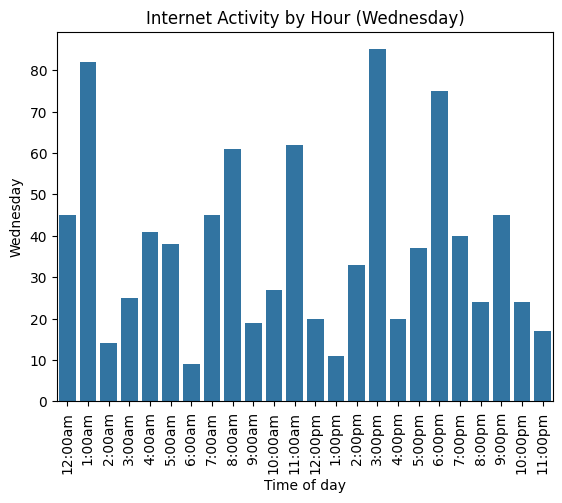

In [28]:
ax = sns.barplot(x='Time of day', y='Wednesday', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
ax.set(title='Internet Activity by Hour (Wednesday)')

C:\Users\cshac\AppData\Local\Temp\ipykernel_7908\3071339873.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')


[Text(0.5, 1.0, 'Internet Activity by Hour (Thursday)')]

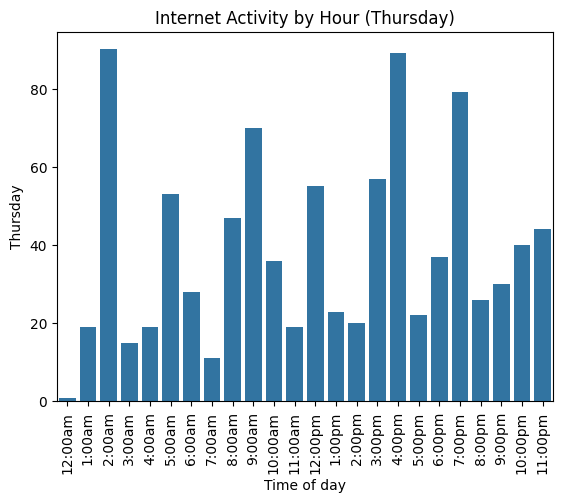

In [29]:
ax = sns.barplot(x='Time of day', y='Thursday', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
ax.set(title='Internet Activity by Hour (Thursday)')

C:\Users\cshac\AppData\Local\Temp\ipykernel_7908\3868062196.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')


[Text(0.5, 1.0, 'Internet Activity by Hour (Friday)')]

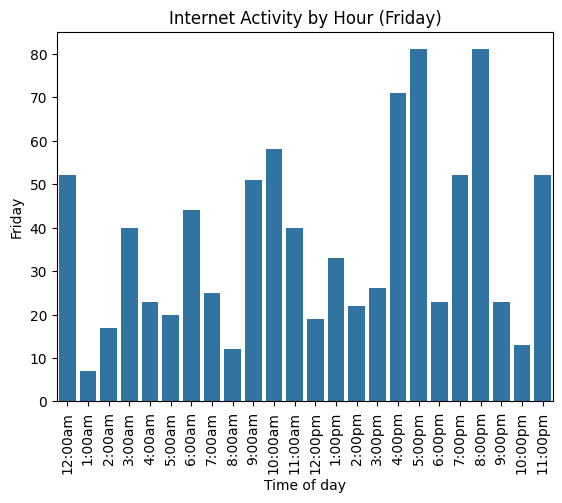

In [30]:
ax = sns.barplot(x='Time of day', y='Friday', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
ax.set(title='Internet Activity by Hour (Friday)')

C:\Users\cshac\AppData\Local\Temp\ipykernel_7908\1930607160.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')


[Text(0.5, 1.0, 'Internet Activity by Hour (Saturday)')]

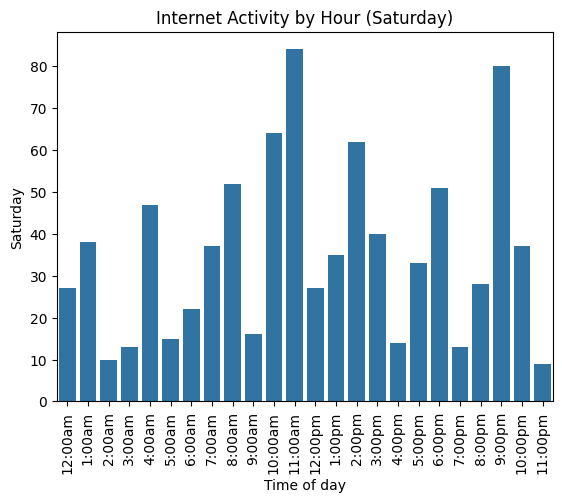

In [31]:
ax = sns.barplot(x='Time of day', y='Saturday', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
ax.set(title='Internet Activity by Hour (Saturday)')

In [32]:
# Graphs of internet activity over time (week) (collects websites)

data = pd.DataFrame()

eventsByDayOfWeek = [0] * 7

number_of_events_for_each_site_on_sunday = [0] * len(websites)
number_of_events_for_each_site_on_monday = [0] * len(websites)
number_of_events_for_each_site_on_tuesday = [0] * len(websites)
number_of_events_for_each_site_on_wednesday = [0] * len(websites)
number_of_events_for_each_site_on_thursday = [0] * len(websites)
number_of_events_for_each_site_on_friday = [0] * len(websites)
number_of_events_for_each_site_on_saturday = [0] * len(websites)


for i in range(len(websites)):
  site = websites[i]
  for event in site['events']:
    timestamp = event['timestamp']
    day = (int)(1970 + timestamp/60/60/24)

    dayOfWeek = day % 7 + 4
    if dayOfWeek > 6:
      dayOfWeek -= 7
    eventsByDayOfWeek[dayOfWeek] += 1

    if day % 7 == 3:
      number_of_events_for_each_site_on_sunday[i] += 1
    if day % 7 == 4:
      number_of_events_for_each_site_on_monday[i] += 1
    if day % 7 == 5:
      number_of_events_for_each_site_on_tuesday[i] += 1
    if day % 7 == 6:
      number_of_events_for_each_site_on_wednesday[i] += 1
    if day % 7 == 0:
      number_of_events_for_each_site_on_thursday[i] += 1
    if day % 7 == 1:
      number_of_events_for_each_site_on_friday[i] += 1
    if day % 7 == 2:
      number_of_events_for_each_site_on_saturday[i] += 1


C:\Users\cshac\AppData\Local\Temp\ipykernel_7908\63098089.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')


[Text(0.5, 1.0, 'Top 5 Most Visited Sites on Sunday')]

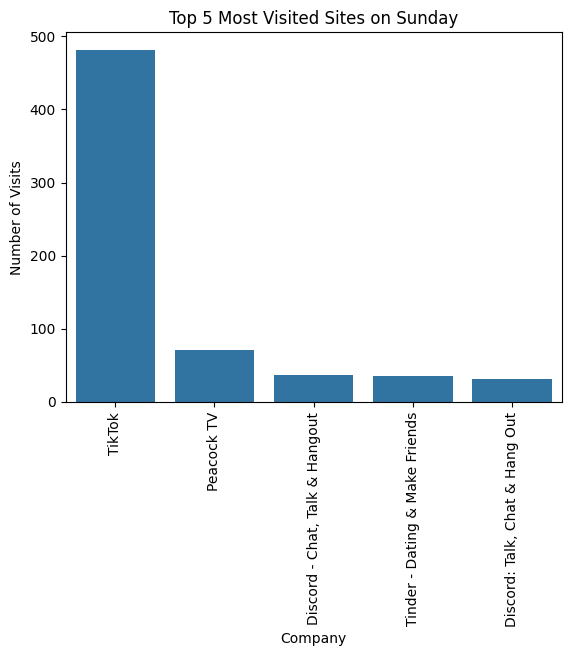

In [33]:
d = {'Company':[], 'Number of Visits':[]}
n = 5

company_names = []
number_of_visits = []

for i in range(len(number_of_events_for_each_site_on_sunday)):
  site_total_on_day = number_of_events_for_each_site_on_sunday[i]
  if n < 0:
    break
  if site_total_on_day > 0:
    company_names
    company_names.append(websites[i]['name'])
    number_of_visits.append(site_total_on_day)

insertionSort(number_of_visits, company_names)

d['Company'] = company_names[0:n]
d['Number of Visits'] = number_of_visits[0:n]

df = pd.DataFrame(data = d)

ax = sns.barplot(x='Company', y='Number of Visits', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
ax.set(title='Top 5 Most Visited Sites on Sunday')

In [34]:
company_names_and_number_of_visits = [{} for k in range(numberOfYears)]

for site in websites:
  for event in site['events']:
    timestamp = event['timestamp']
    year = (int)(1970 + timestamp/60/60/24/365.25) # will be a valid year
    year -= lowestYear

    if site['name'] in company_names_and_number_of_visits[year]:
      company_names_and_number_of_visits[year][site['name']] += 1
    else:
      company_names_and_number_of_visits[year][site['name']] = 1

In [35]:
top5Companies = [[0] * 5] * numberOfYears
top5Activities = [[0] * 5] * numberOfYears

for year in range(len(company_names_and_number_of_visits)):
  companies = []
  activities = []

  for site in company_names_and_number_of_visits[year].items():
    company, activity = site
    companies.append(company)
    activities.append(activity)

  insertionSort(activities, companies)
  top5Companies[year] = companies[0:5]
  top5Activities[year] = activities[0:5]

C:\Users\cshac\AppData\Local\Temp\ipykernel_7908\444867298.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')


[Text(0.5, 1.0, 'Top 5 companies in 2021')]

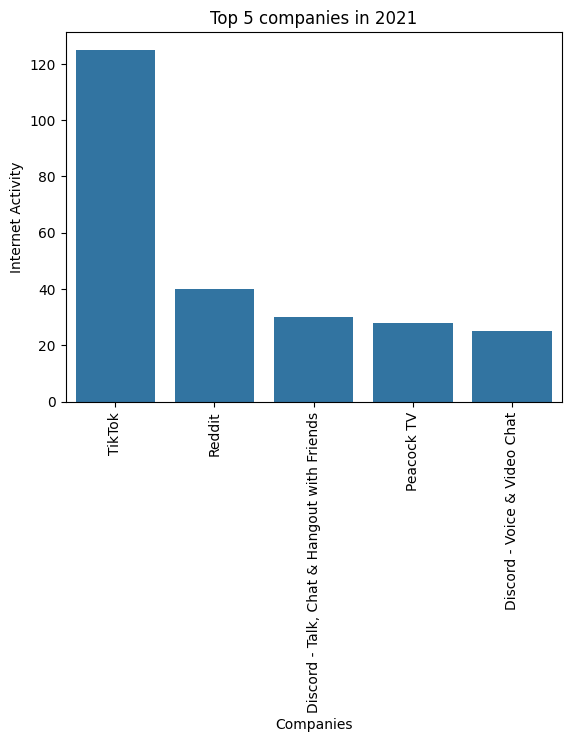

In [36]:
curYear = 0

data['Companies'] = pd.DataFrame(top5Companies[curYear])
data['Internet Activity'] = pd.DataFrame(top5Activities[curYear])

ax = sns.barplot(x='Companies', y='Internet Activity', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
ax.set(title='Top 5 companies in ' + str(lowestYear + curYear))

C:\Users\cshac\AppData\Local\Temp\ipykernel_7908\3281434302.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')


[Text(0.5, 1.0, 'Top 5 companies in 2022')]

C:\Users\cshac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 132 (\x84) missing from current font.
  func(*args, **kwargs)
C:\Users\cshac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 132 (\x84) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


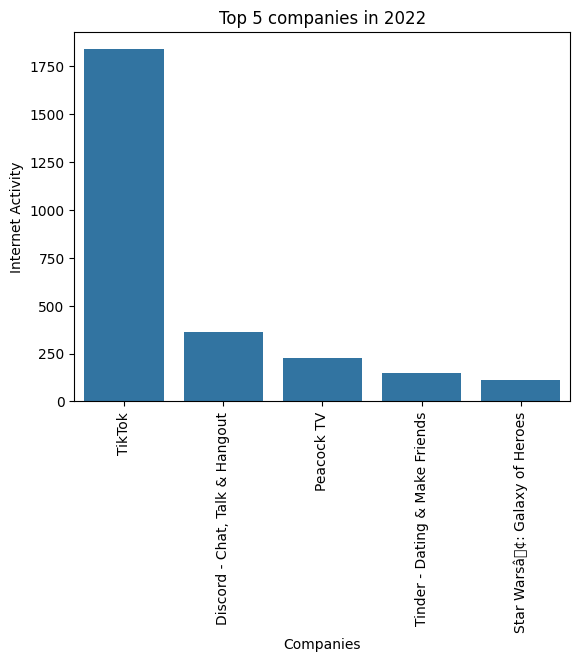

In [37]:
curYear = 1

data['Companies'] = pd.DataFrame(top5Companies[curYear])
data['Internet Activity'] = pd.DataFrame(top5Activities[curYear])

ax = sns.barplot(x='Companies', y='Internet Activity', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
ax.set(title='Top 5 companies in ' + str(lowestYear + curYear))

C:\Users\cshac\AppData\Local\Temp\ipykernel_7908\1131926242.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')


[Text(0.5, 1.0, 'Top 5 companies in 2023')]

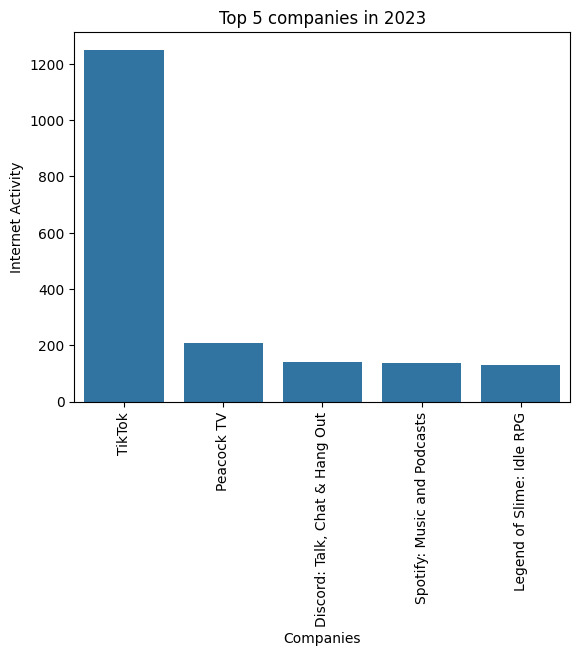

In [38]:
curYear = 2

data['Companies'] = pd.DataFrame(top5Companies[curYear])
data['Internet Activity'] = pd.DataFrame(top5Activities[curYear])

ax = sns.barplot(x='Companies', y='Internet Activity', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
ax.set(title='Top 5 companies in ' + str(lowestYear + curYear))

In [39]:
for i in range(len(top5Companies)):
  for j in range(len(top5Companies[0])):
    print(top5Companies[i][j])
  print('')

TikTok
Reddit
Discord - Talk, Chat & Hangout with Friends
Peacock TV
Discord - Voice & Video Chat

TikTok
Discord - Chat, Talk & Hangout
Peacock TV
Tinder - Dating & Make Friends
Star Warsâ¢: Galaxy of Heroes

TikTok
Peacock TV
Discord: Talk, Chat & Hang Out
Spotify: Music and Podcasts
Legend of Slime: Idle RPG



In [40]:
# Removes sites that were in previous years - for changes of top 5 between years

for year in range(len(top5Companies)):
  for site in range(len(top5Companies[0])):
    for year2 in range(year + 1, len(top5Companies)):
      for site2 in range(len(top5Companies[0])):
        if top5Companies[year][site] == top5Companies[year2][site2]:
          top5Companies[year2][site2] = '-----'

In [41]:
for i in range(len(top5Companies)):
  for j in range(len(top5Companies[0])):
    print(top5Companies[i][j])
  print('')

TikTok
Reddit
Discord - Talk, Chat & Hangout with Friends
Peacock TV
Discord - Voice & Video Chat

-----
Discord - Chat, Talk & Hangout
-----
Tinder - Dating & Make Friends
Star Warsâ¢: Galaxy of Heroes

-----
-----
Discord: Talk, Chat & Hang Out
Spotify: Music and Podcasts
Legend of Slime: Idle RPG



### Analysis of activity

In [42]:
import math

mostActiveMonth = 0
leastActiveMonth = 0 # Probably not helpful, will want better ranges later if feasible

firstMonth = True

for i in range(len(eventsByMonthAndYear)):
  if firstMonth:
    if eventsByMonthAndYear[i] != 0:
      firstMonth = False
      mostActiveMonth = i
      leastActiveMonth = i
    continue

  if eventsByMonthAndYear[i] > eventsByMonthAndYear[mostActiveMonth]:
    mostActiveMonth = i
  if eventsByMonthAndYear[i] < eventsByMonthAndYear[leastActiveMonth]:
    leastActiveMonth = i

print('Most Active Month = ' + months[mostActiveMonth % 12] + ' ' + str(int(lowestYear+(mostActiveMonth - (mostActiveMonth % 12))/12)) + ', ' + str(eventsByMonthAndYear[mostActiveMonth]) + ' events.')
print('Least Active Month = ' + months[leastActiveMonth % 12] + ' ' + str(int(lowestYear+(leastActiveMonth - (leastActiveMonth % 12))/12)) + ', ' + str(eventsByMonthAndYear[leastActiveMonth]) + ' events.')

Most Active Month = September 2023, 582 events.
Least Active Month = November 2023, 0 events.


###EVENTS

In [43]:
data = pd.read_json(name_of_file, orient='records')
websites = data['off_facebook_activity_v2']

typeArray = {
}

for i in range (len(websites)):
  for j in range (len(websites[i]['events'])):
    type_of_event = websites[i]['events'][j]['type']
    if type_of_event not in typeArray:
      typeArray[type_of_event] = 1
    else:
      typeArray[type_of_event] = typeArray[type_of_event] + 1

    if type_of_event == 'PURCHASE':
      print (type_of_event + ' = ' + websites[i]['name'])
    if type_of_event == 'ADD_TO_WISHLIST':
      print (type_of_event + ' = ' + websites[i]['name'])
    if type_of_event == 'ACHIEVEMENT_UNLOCKED':
      print (type_of_event + ' = ' + websites[i]['name'])
    if type_of_event == 'LEVEL_ACHIEVED':
      print (type_of_event + ' = ' + websites[i]['name'])
    if type_of_event == 'COMPLETE_REGISTRATION':
      print (type_of_event + ' = ' + websites[i]['name'])
    if type_of_event == 'TUTORIAL_COMPLETION':
      print (type_of_event + ' = ' + websites[i]['name'])
    if type_of_event == 'ADD_TO_CART':
      print (type_of_event + ' = ' + websites[i]['name'])

print()
typeArray

LEVEL_ACHIEVED = Twitch: Live Game Streaming
LEVEL_ACHIEVED = Twitch: Live Game Streaming
LEVEL_ACHIEVED = Twitch: Live Game Streaming
LEVEL_ACHIEVED = Twitch: Live Game Streaming
PURCHASE = Venmo
PURCHASE = Venmo
PURCHASE = Venmo
PURCHASE = Venmo
COMPLETE_REGISTRATION = williamsflowers.com
PURCHASE = Bridg Inc.
PURCHASE = Bridg Inc.
PURCHASE = Bridg Inc.
PURCHASE = Bridg Inc.
PURCHASE = Bridg Inc.
PURCHASE = EA - Electronic Arts
PURCHASE = EA - Electronic Arts
PURCHASE = EA - Electronic Arts
PURCHASE = EA - Electronic Arts
PURCHASE = EA - Electronic Arts
PURCHASE = EA - Electronic Arts
PURCHASE = Activision Publishing
COMPLETE_REGISTRATION = Grammarly
PURCHASE = Nonogram.com - picture cross
ADD_TO_WISHLIST = Solitaire - classic klondike
PURCHASE = GWD Concept
PURCHASE = GWD Concept



{'ACTIVATE_APP': 5147,
 'CUSTOM': 928,
 'ADD_PAYMENT_INFO': 1,
 'LEVEL_ACHIEVED': 4,
 'PAGE_VIEW': 187,
 'VIEW_CONTENT': 13,
 'PURCHASE': 19,
 'COMPLETE_REGISTRATION': 2,
 'SEARCH': 1,
 'SPENT_CREDITS': 1,
 'ADD_TO_WISHLIST': 1,
 'LEAD': 1}

Liam:

*   PURCHASE = NintendoAmerica
*   ACHIEVEMENT_UNLOCKED = KonoSuba: Fantastic Days
*   LEVEL_ACHIEVED = KonoSuba: Fantastic Days
*   ADD_TO_WISHLIST = KonoSuba: Fantastic Days
*   COMPLETE_REGISTRATION = KonoSuba: Fantastic Days
*   TUTORIAL_COMPLETION = KonoSuba: Fantastic Days
*   COMPLETE_REGISTRATION = Grammarly
*   COMPLETE_REGISTRATION = numerade.com
*   ADD_TO_CART = pixiv.com (*5)

Carter:



*   LEVEL_ACHIEVED = Twitch: Live Game Streaming
*   LEVEL_ACHIEVED = Twitch: Live Game Streaming
*   LEVEL_ACHIEVED = Twitch: Live Game Streaming
*   LEVEL_ACHIEVED = Twitch: Live Game Streaming
*   PURCHASE = Venmo
*   PURCHASE = Venmo
*   PURCHASE = Venmo
*   PURCHASE = Venmo
*   COMPLETE_REGISTRATION = williamsflowers.com
*   PURCHASE = Bridg Inc.
*   PURCHASE = Bridg Inc.
*   PURCHASE = Bridg Inc.
*   PURCHASE = Bridg Inc.
*   PURCHASE = Bridg Inc.
*   PURCHASE = EA - Electronic Arts
*   PURCHASE = EA - Electronic Arts
*   PURCHASE = EA - Electronic Arts
*   PURCHASE = EA - Electronic Arts
*   PURCHASE = EA - Electronic Arts
*   PURCHASE = EA - Electronic Arts
*   PURCHASE = Activision Publishing
*   COMPLETE_REGISTRATION = Grammarly
*   PURCHASE = Nonogram.com - picture cross
*   ADD_TO_WISHLIST = Solitaire - classic klondike
*   PURCHASE = GWD Concept
*   PURCHASE = GWD Concept

Notes: Need more data to get a more complete list of events.

Related links:

https://www.facebook.com/business/help/447834205249495

https://help.funnel.io/en/articles/1981284-what-data-can-i-get-from-facebook-ads

# HTML

In [44]:
#import os
#directory = '/content/drive/MyDrive/HTML Off Facebook Activity/your_off-facebook_activity'

#websites = []
#website_names = []

#from bs4 import BeautifulSoup

#with open('/content/drive/MyDrive/HTML Off Facebook Activity/your_off-facebook_activity/0.html') as fp:
#    soup = BeautifulSoup(fp, 'html.parser')

#HTML_events = soup.find_all('div', {'class': '_2pi3'})
#len(HTML_events)-1 # First element is not an event

In [45]:
#websites = []
#website_names = []

#for filename in os.listdir(directory):
#  f = os.path.join(directory, filename)
#  if os.path.isfile(f):
#    with open(f) as fp:
#     soup = BeautifulSoup(fp, 'html.parser')
#      HTML_website_name = soup.find('div', {'class': '_4-u3 _5dwa _5dw9'}).get_text()
#      HTML_events = soup.find_all('div', {'class': '_2pi3'})
#      website_names.append((HTML_website_name[23:], len(HTML_events)-1))

#website_names

# Website Categorization - Web Scraping from Google & Semrush

In [46]:
from bs4 import BeautifulSoup
import requests
import time
from lxml import etree
import random

In [47]:
# Get name of website, then run a Google search with it

website_name = 'bulbapedia'

url = 'https://www.google.com/search?q=' + website_name

print('Googling website name...')

response = requests.get(url)
soup = BeautifulSoup(response.text,'html.parser')

Googling website name...


In [48]:
# Find & copy first link

dom = etree.HTML(str(soup))

website_link = dom[1][1][3][0][0][0][0][1][0].text

'''
website_link = ''

for i in dom.itertext():
  if(i.startswith('www.')):
    website_link = i[4::]
    break

for i in dom.itertext():
  print(i)

print(website_link)
'''

"\nwebsite_link = ''\n\nfor i in dom.itertext():\n  if(i.startswith('www.')):\n    website_link = i[4::]\n    break\n\nfor i in dom.itertext():\n  print(i)\n\nprint(website_link)\n"

In [49]:
#dom[1][1][3][0][0][0][0][1][0].getchildren()

In [50]:
#dom[1][1][3][0][0][0][0][1][0].text

In [51]:
# Input link into Semrush

second_to_last_dot = website_link.rfind('.', 0, website_link.rfind('.'))

if second_to_last_dot != -1:
  website_link = website_link[second_to_last_dot + 1:]

print(website_link)

if ' ' in website_link:
  website_link = website_link[:website_link.find(' ')]
  print(website_link)

url = 'https://www.semrush.com/website/' + website_link + '/overview/'

print('Inputting url into')

response = requests.get(url)
soup = BeautifulSoup(response.text,'html.parser')

bulbagarden.net › wiki › Main_Page
bulbagarden.net
Inputting url into


In [52]:
dom = etree.HTML(str(soup))

In [53]:
# Get categories

categories = dom[1][1][7].find('div')[1][0][3][0][0][0][1]
categories_list = []

if categories_list == 0:
  print('No categories found.')

for i in categories.itertext():
  categories_list.append(i)

categories_list

IndexError: list index out of range

In [ ]:
# time.sleep(5 + random.random()*10)

# Comparisons

In [ ]:
#ads_interests = pd.read_csv('/content/ads_interests.csv')

In [ ]:
'''
for i in website_names:
  i = i[0]
  for j in ads_interests:
    if i == j:
      print(i)
      break
'''

'\nfor i in website_names:\n  i = i[0]\n  for j in ads_interests:\n    if i == j:\n      print(i)\n      break\n'